## Random forests for image approximation

### a. Loading the image

(900, 604, 3)


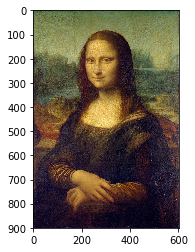

In [1]:
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

img = plt.imread('mona-lisa.jpg' )
print(img.shape)
plt.imshow(img)
plt.show()

### b. c. Preprocessing

In [2]:

train_data = np.zeros((5000,2))
train_labels = np.zeros((5000,3))

test_data = np.zeros((img.shape[0]*img.shape[1],2))
idx = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        test_data[idx] = [i,j]
        idx += 1

print(test_data)
for i in range(5000):
    coord = []
    coord.append(np.random.randint(img.shape[0]))
    coord.append(np.random.randint(img.shape[1]))
    train_data[i] = coord
    train_labels[i] = img[coord[0]][coord[1]]/ 255.0
print(train_data.shape)
print(train_labels.shape)

[[   0.    0.]
 [   0.    1.]
 [   0.    2.]
 ..., 
 [ 899.  601.]
 [ 899.  602.]
 [ 899.  603.]]
(5000, 2)
(5000, 3)


### d. Random forest

(543600,) (543600,) (543600,)


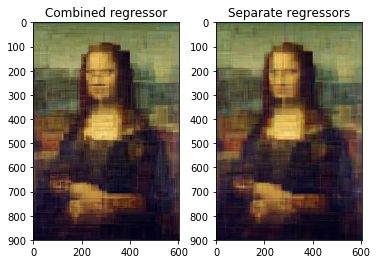

In [3]:
from sklearn.ensemble.forest import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_data, train_labels)
output1 = rf.predict(test_data)

rf_red = RandomForestRegressor()
rf_red.fit(train_data, train_labels[:,0])
red_values = rf_red.predict(test_data)

rf_green = RandomForestRegressor()
rf_green.fit(train_data, train_labels[:,1])
green_values = rf_green.predict(test_data)

rf_blue = RandomForestRegressor()
rf_blue.fit(train_data, train_labels[:,2])
blue_values = rf_blue.predict(test_data)

print(red_values.shape,green_values.shape,blue_values.shape)

output2 = np.column_stack((red_values,green_values,blue_values))


fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(output1.reshape(img.shape[0],img.shape[1],img.shape[2]))
plt.title('Combined regressor')
fig.add_subplot(1, 2, 2)
plt.imshow(output2.reshape(img.shape[0],img.shape[1],img.shape[2]))
plt.title('Separate regressors')
plt.show()

### e. Experimentation

### (i) Fixed number of trees with variable depth

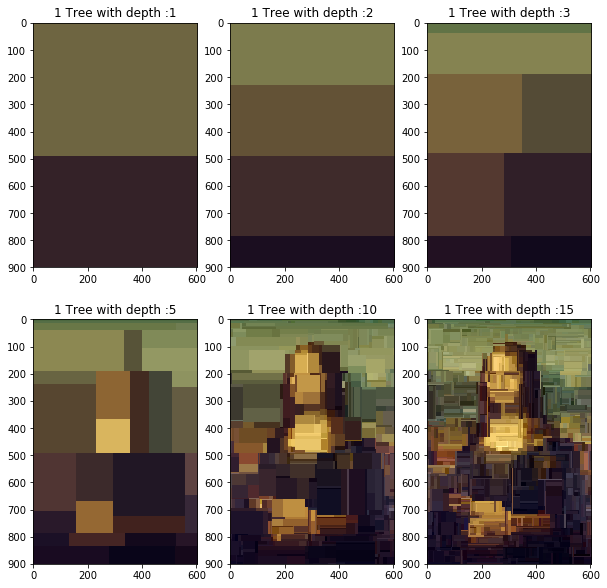

In [4]:
depths = [1, 2, 3, 5, 10, 15]
plotnum=1
fig = plt.figure(figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(3):
        fig.add_subplot(2, 3, plotnum)
        rf = RandomForestRegressor(n_estimators=1, max_depth=depths[idx])
        rf.fit(train_data, train_labels)
        output = rf.predict(test_data)
        plt.imshow(output.reshape(img.shape[0],img.shape[1],img.shape[2]))
        plt.title('1 Tree with depth :'+str(depths[idx]))
        idx+=1
        plotnum+=1
plt.show()

### (ii) Variable number of trees with fixed depth

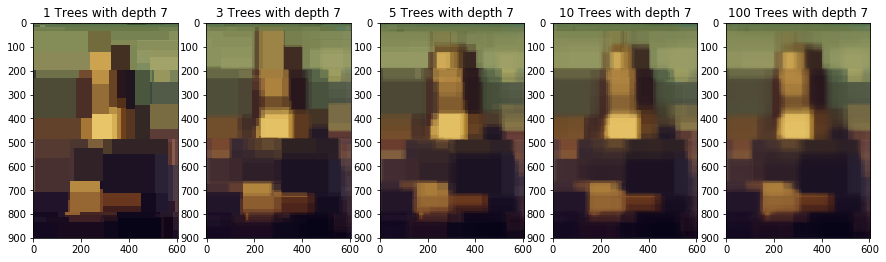

In [5]:
numTrees = [1, 3, 5, 10, 100]
plotnum=1
fig = plt.figure(figsize=(15, 15))
idx = 0
for i in range(5):
    fig.add_subplot(1, 5, plotnum)
    rf = RandomForestRegressor(n_estimators=numTrees[idx], max_depth=7)
    rf.fit(train_data, train_labels)
    output = rf.predict(test_data)
    plt.imshow(output.reshape(img.shape[0],img.shape[1],img.shape[2]))
    plt.title(str(numTrees[idx])+' Trees with depth 7')
    idx+=1
    plotnum+=1
plt.show()

### (iii) kNN regressor

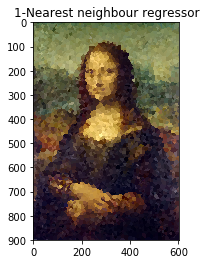

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data, train_labels)
output = knn.predict(test_data)

plt.imshow(output.reshape(img.shape[0],img.shape[1],img.shape[2]))
plt.title('1-Nearest neighbour regressor')
plt.show()

### (iv) Pruning

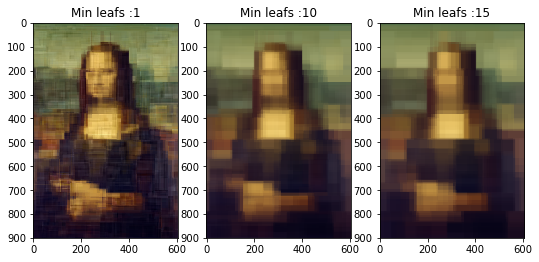

In [17]:
numTrees = 10
depth = 20
leafs = [1,10,15]
plotnum=1
fig = plt.figure(figsize=(15, 15))
idx = 0
for i in range(3):
    fig.add_subplot(1, 5, plotnum)
    rf = RandomForestRegressor(n_estimators=numTrees, max_depth=depth, min_samples_leaf=leafs[idx])
    rf.fit(train_data, train_labels)
    output = rf.predict(test_data)
    plt.imshow(output.reshape(img.shape[0],img.shape[1],img.shape[2]))
    plt.title('Min leafs :'+str(leafs[idx]))
    idx+=1
    plotnum+=1
plt.show()